In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

读入数据

In [2]:
data = pd.read_csv(r"data\2020-07-24.csv",header=None)
data.columns = ['传感器编号','数据a','数据b','时间戳','日期']
data

,传感器编号,数据a,数据b,时间戳,日期
0,8c,0.05,41.18,1595520000007,2020-07-24 00:00:00.007
1,8f,1.20,57.44,1595520000097,2020-07-24 00:00:00.097
2,8c,0.21,3.64,1595520001007,2020-07-24 00:00:01.007
3,8f,1.31,86.40,1595520001037,2020-07-24 00:00:01.037
4,8f,1.31,71.86,1595520001997,2020-07-24 00:00:01.997
...,...,...,...,...,...
172594,8f,0.66,325.29,1595606397197,2020-07-24 23:59:57.197
172595,8c,3.45,65.33,1595606398151,2020-07-24 23:59:58.151
172596,8f,0.66,170.19,1595606398157,2020-07-24 23:59:58.157
172597,8f,0.66,153.13,1595606399147,2020-07-24 23:59:59.147


In [6]:
gb=data.groupby('传感器编号')
dir(gb)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 '_deprecations',
 '_dir_additi

In [9]:
gb.groups

{'8c': Int64Index([     0,      2,      5,      6,      8,     10,     13,     14,
                 16,     19,
             ...
             172579, 172581, 172583, 172586, 172588, 172589, 172591, 172593,
             172595, 172598],
            dtype='int64', length=86300),
 '8f': Int64Index([     1,      3,      4,      7,      9,     11,     12,     15,
                 17,     18,
             ...
             172580, 172582, 172584, 172585, 172587, 172590, 172592, 172594,
             172596, 172597],
            dtype='int64', length=86299)}

查看传感器种类

In [132]:
data_dict = {}
name_list = []
for name,data_by_group in data.groupby('传感器编号'):
    data_dict[name] = data_by_group
    name_list.append(name)
name_list

['8c', '8f']

查看每个传感器的数据量

In [66]:
data_8c=data_dict[name_list[0]]
data_8f=data_dict[name_list[1]]
print('传感器8c有',len(data_8c),'条数据；')
print('传感器8f有',len(data_8f),'条数据。')

传感器8c有 86300 条数据；
传感器8f有 86299 条数据。


关于数据a：对于两个传感器各选取的同一段时间内的数据，比较两个传感器所传输的数据之间的差异

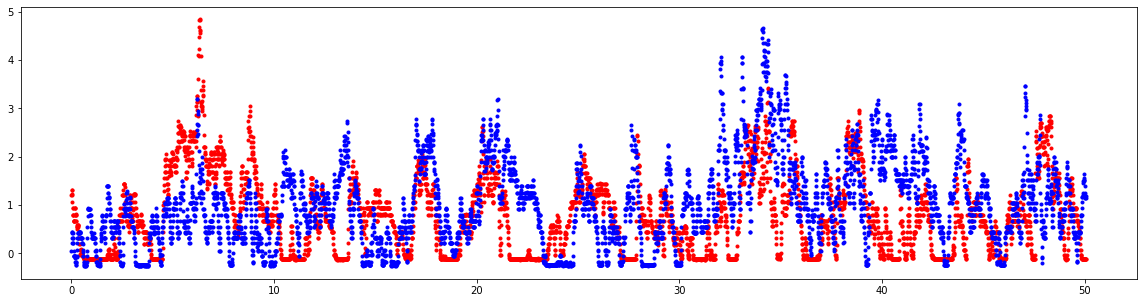

In [137]:
plt.figure(figsize=(20,5)) 
data_a1 = data_8f[0:5000]
plt.plot((data_a1['时间戳']-1595520000007)/100000,data_a1['数据a'], '.',color = 'red')
data_a2 = data_8c[0:5000]
plt.plot((data_a2['时间戳']-1595520000007)/100000,data_a2['数据a'], '.',color = 'blue')

对于数据b也进行同样的操作

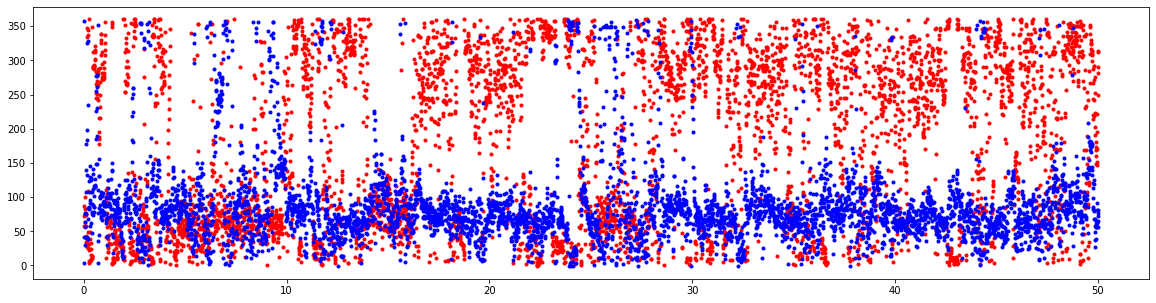

In [135]:
plt.figure(figsize=(20,5)) 
data_b1 = data_8f[0:5000]
plt.plot((data_b1['时间戳']-1595520000007)/100000,data_b1['数据b'], '.',color = 'red')
data_b2 = data_8c[0:5000]
plt.plot((data_b2['时间戳']-1595520000007)/100000,data_b2['数据b'], '.',color = 'blue')

从上两张图来看，直观感受两个传感器的两种数据都有一定的相关性，关于数据a的相关性强于数据b。
数据a：传感器8c的数据增大时，8f的也有增大的趋势，反之亦然，关联性较强。
数据b：传感器8f的数据波动较大，8c较为集中，两者时间关联性不是很大。

将数据帧转为序列，两个传感器分别有两种数据（a，b），共四个序列

In [136]:
n=86299
a = np.linspace(1,n,n,dtype = int)
data_c=data_8c[0:n]
data_ca=data_c['数据a']
data_cb=data_c['数据b']
data_fa=data_8f['数据a']
data_fb=data_8f['数据b']
c_a=pd.Series(data_ca.values,index=list(a))
c_b=pd.Series(data_cb.values,index=list(a))
f_a=pd.Series(data_fa.values,index=list(a))
f_b=pd.Series(data_fb.values,index=list(a))

将一个传感器的数据看作是对另一个传感器数据的拟合，计算拟合系数：

In [140]:
f_am=f_a.mean()
#总平方和SST
sst_a=0
for i in range(n):
    sst_a+=((f_a[i+1]-f_am)*(f_a[i+1]-f_am))
#回归平方和SSE
ssr_a=0
for i in range(n):
    ssr_a+=((c_a[i+1]-f_am)*(c_a[i+1]-f_am))
r2_a=ssr_a/sst_a
print('a数据的拟合系数（R2）：',r2_a)

a数据的拟合系数（R2）： 0.6760978035960289


In [141]:
f_bm=f_b.mean()
#总平方和SST
sst_b=0
for i in range(n):
    sst_b+=((f_b[i+1]-f_bm)*(f_b[i+1]-f_bm))
#回归平方和SSE
ssr_b=0
for i in range(n):
    ssr_b+=((c_b[i+1]-f_bm)*(c_b[i+1]-f_bm))
r2_b=ssr_b/sst_b
print('b数据的拟合系数（R2）：',r2_b)

b数据的拟合系数（R2）： 0.7246601269891076


分别计算两种数据的Spearman秩相关系数（斯皮尔曼相关系数）

In [144]:
data_Person = pd.DataFrame({'8c_a':c_a.values,
                     '8f_a':f_a.values})
data_Person.corr(method='spearman')

,8c_a,8f_a
8c_a,1.000000,0.266906
8f_a,0.266906,1.000000


In [145]:
data_Person = pd.DataFrame({'8c_b':c_b.values,
                     '8f_b':f_b.values})
data_Person.corr(method='spearman')

,8c_b,8f_b
8c_b,1.00000,-0.13455
8f_b,-0.13455,1.00000


发现两者相关度十分低，应当是由于Spearman系数对于异常值十分敏感的缘故